# Importing Packgages 

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score

# Loading DataSet

In [5]:
df=pd.read_csv("dataset.csv")
df.head(18)

,Student_ID,Years,Entrance_Test_Score,Enroll_Date_Time,Course_ID,Course_Progress,Online,Gender,International,Complete,Skewness,Standard_Deviation,Kurtosis,Q1,Q2,Q3,Q4,Q5,Q6
0,172777,0,47.0,159227767,807728,76,0,1,0,1,4.818558e-01,6.610598,-1.749132,1,1,1,0,0,0
1,172777,0,47.0,159227782,658434,67,0,1,0,1,4.218474e-01,8.080842,-2.784252,1,1,1,0,0,0
2,172777,0,47.0,159227866,658463,64,0,1,0,1,-3.885181e-01,7.516648,-1.727778,1,1,1,0,0,0
3,172777,0,47.0,159227948,658498,69,0,1,0,1,9.814233e-02,5.805170,-2.631264,1,1,1,0,0,0
4,175658,0,92.8,157446419,807728,80,0,1,0,1,1.183248e+00,10.583005,1.911113,0,0,0,1,1,1
5,175658,5,92.8,157446424,658434,82,0,1,0,0,9.978656e-01,10.573552,1.450664,0,0,0,1,1,1
6,175658,4,92.8,157446441,658463,75,0,1,0,0,5.122408e-01,10.876580,-0.290699,0,0,0,1,1,1
7,175658,4,92.8,157446449,658498,70,0,1,0,0,-1.906699e-01,10.064790,1.414553,0,0,0,1,1,1
8,175658,0,92.8,157446458,807754,98,0,1,0,1,1.428470e+00,6.041523,2.675549,0,0,0,1,1,1
9,175658,5,92.8,157446463,658438,82,0,1,0,0,-8.206099e-01,4.062019,-0.424242,0,0,0,1,1,1


# Data Preprosessing and cleaning

## Replacing values

In [7]:
df['Online'] = df['Online'].replace(['no'],0)
df['Online'] = df['Online'].replace(['yes'],1)
df['Complete'] = df['Complete'].replace(['no'],0)
df['Complete'] = df['Complete'].replace(['yes'],1)
df['International'] = df['International'].replace(['no'],0)
df['International'] = df['International'].replace(['yes'],1)
df

,Student_ID,Years,Entrance_Test_Score,Enroll_Date_Time,Course_ID,Course_Progress,Online,Gender,International,Complete,Skewness,Standard_Deviation,Kurtosis,Q1,Q2,Q3,Q4,Q5,Q6
0,172777,0,47.0,159227767,807728,76,0,1,0,1,0.481856,6.610598,-1.749132,1,1,1,0,0,0
1,172777,0,47.0,159227782,658434,67,0,1,0,1,0.421847,8.080842,-2.784252,1,1,1,0,0,0
2,172777,0,47.0,159227866,658463,64,0,1,0,1,-0.388518,7.516648,-1.727778,1,1,1,0,0,0
3,172777,0,47.0,159227948,658498,69,0,1,0,1,0.098142,5.805170,-2.631264,1,1,1,0,0,0
4,175658,0,92.8,157446419,807728,80,0,1,0,1,1.183248,10.583005,1.911113,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5852,294733,5,0.0,159394514,658434,79,0,1,0,0,-1.632502,20.969025,2.652954,0,0,0,1,1,1
5853,294733,0,0.0,159395317,658463,61,0,1,0,0,-1.743560,19.854471,3.176373,0,0,0,1,1,1
5854,294763,0,0.0,160062775,807728,78,0,1,0,1,-1.971060,19.929877,4.121874,0,0,0,1,1,1
5855,294763,0,0.0,160062795,658434,28,0,1,0,0,-1.896996,18.033303,3.703608,0,0,0,1,1,1


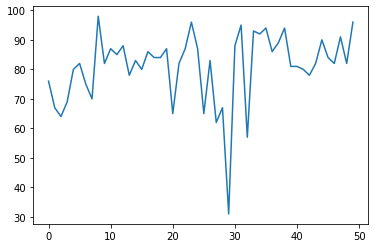

In [9]:
x=df["Course_Progress"]
y=x[0:50]
plt.plot(y)

## Calculation of Statistcial Measures over Course Progress

In [10]:
x = df['Course_Progress'].rolling(window=5).skew()
x=x.tolist()
x=x[4:]+x[:4]
df["Skewness"] = x
sma = df['Course_Progress'].rolling(window=5).std()
sma=sma.tolist()
sma=sma[4:]+sma[:4]
df["Standard_Deviation"] = sma
y = df['Course_Progress'].rolling(window=5).kurt()
y=y.tolist()
y=y[4:]+y[:4]
df["Kurtosis"] = y

In [11]:
df

,Student_ID,Years,Entrance_Test_Score,Enroll_Date_Time,Course_ID,Course_Progress,Online,Gender,International,Complete,Skewness,Standard_Deviation,Kurtosis,Q1,Q2,Q3,Q4,Q5,Q6
0,172777,0,47.0,159227767,807728,76,0,1,0,1,0.481856,6.610598,-1.749132,1,1,1,0,0,0
1,172777,0,47.0,159227782,658434,67,0,1,0,1,0.421847,8.080842,-2.784252,1,1,1,0,0,0
2,172777,0,47.0,159227866,658463,64,0,1,0,1,-0.388518,7.516648,-1.727778,1,1,1,0,0,0
3,172777,0,47.0,159227948,658498,69,0,1,0,1,0.098142,5.805170,-2.631264,1,1,1,0,0,0
4,175658,0,92.8,157446419,807728,80,0,1,0,1,1.183248,10.583005,1.911113,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5852,294733,5,0.0,159394514,658434,79,0,1,0,0,-1.632502,20.969025,2.652954,0,0,0,1,1,1
5853,294733,0,0.0,159395317,658463,61,0,1,0,0,NaN,NaN,NaN,0,0,0,1,1,1
5854,294763,0,0.0,160062775,807728,78,0,1,0,1,NaN,NaN,NaN,0,0,0,1,1,1
5855,294763,0,0.0,160062795,658434,28,0,1,0,0,NaN,NaN,NaN,0,0,0,1,1,1


## Checking for null Values

In [60]:
df.isnull().sum()

student_id             0
years                  0
entrance_test_score    0
enroll_date_time       0
course_id              0
Course_progress        0
online                 0
gender                 0
international          0
complete               0
Skewness               4
Standard_Deviation     4
Kurtosis               4
dtype: int64

## Droping Null Values

In [61]:
df=df.dropna()

In [62]:
df

,student_id,years,entrance_test_score,enroll_date_time,course_id,Course_progress,online,gender,international,complete,Skewness,Standard_Deviation,Kurtosis
0,172777,0,47.0,159227767,807728,76,0,1,0,1,0.481856,6.610598,-1.749132
1,172777,0,47.0,159227782,658434,67,0,1,0,1,0.421847,8.080842,-2.784252
2,172777,0,47.0,159227866,658463,64,0,1,0,1,-0.388518,7.516648,-1.727778
3,172777,0,47.0,159227948,658498,69,0,1,0,1,0.098142,5.805170,-2.631264
4,175658,0,92.8,157446419,807728,80,0,1,0,1,1.183248,10.583005,1.911113
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5852,294733,5,0.0,159394514,658434,79,0,1,0,0,-1.632502,20.969025,2.652954
5853,294733,0,0.0,159395317,658463,61,0,1,0,0,-1.743560,19.854471,3.176373
5854,294763,0,0.0,160062775,807728,78,0,1,0,1,-1.971060,19.929877,4.121874
5855,294763,0,0.0,160062795,658434,28,0,1,0,0,-1.896996,18.033303,3.703608


In [63]:
"""
x=df['student_id']
y=df['complete']
res = {x[i]:y[i] for i in range(len(x))}
q1=[]
q4=[]
for i in x:
    if i in res:
        q1.append(res[i])
for j in q1:
    if j==0:
        q4.append(1)
    
    else:
        q4.append(0)
"""

In [64]:
"""
import warnings
warnings.filterwarnings('ignore')
df["Q1"] = q1
df["Q2"] = q1
df["Q3"] = q1
df["Q4"] = q4
df["Q5"] = q4
df["Q6"] = q4
df.to_csv("dropouts.csv", index=False)
""""

In [65]:
df

,student_id,years,entrance_test_score,enroll_date_time,course_id,Course_progress,online,gender,international,complete,Skewness,Standard_Deviation,Kurtosis,Q1,Q2,Q3,Q4,Q5,Q6
0,172777,0,47.0,159227767,807728,76,0,1,0,1,0.481856,6.610598,-1.749132,1,1,1,0,0,0
1,172777,0,47.0,159227782,658434,67,0,1,0,1,0.421847,8.080842,-2.784252,1,1,1,0,0,0
2,172777,0,47.0,159227866,658463,64,0,1,0,1,-0.388518,7.516648,-1.727778,1,1,1,0,0,0
3,172777,0,47.0,159227948,658498,69,0,1,0,1,0.098142,5.805170,-2.631264,1,1,1,0,0,0
4,175658,0,92.8,157446419,807728,80,0,1,0,1,1.183248,10.583005,1.911113,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5852,294733,5,0.0,159394514,658434,79,0,1,0,0,-1.632502,20.969025,2.652954,0,0,0,1,1,1
5853,294733,0,0.0,159395317,658463,61,0,1,0,0,-1.743560,19.854471,3.176373,0,0,0,1,1,1
5854,294763,0,0.0,160062775,807728,78,0,1,0,1,-1.971060,19.929877,4.121874,0,0,0,1,1,1
5855,294763,0,0.0,160062795,658434,28,0,1,0,0,-1.896996,18.033303,3.703608,0,0,0,1,1,1


# Rearranging Features

In [66]:
cols = df.columns.tolist()
cols=cols[0:9]+cols[10:]+cols[9:10]

In [67]:
df=df[cols]
df

,student_id,years,entrance_test_score,enroll_date_time,course_id,Course_progress,online,gender,international,Skewness,Standard_Deviation,Kurtosis,Q1,Q2,Q3,Q4,Q5,Q6,complete
0,172777,0,47.0,159227767,807728,76,0,1,0,0.481856,6.610598,-1.749132,1,1,1,0,0,0,1
1,172777,0,47.0,159227782,658434,67,0,1,0,0.421847,8.080842,-2.784252,1,1,1,0,0,0,1
2,172777,0,47.0,159227866,658463,64,0,1,0,-0.388518,7.516648,-1.727778,1,1,1,0,0,0,1
3,172777,0,47.0,159227948,658498,69,0,1,0,0.098142,5.805170,-2.631264,1,1,1,0,0,0,1
4,175658,0,92.8,157446419,807728,80,0,1,0,1.183248,10.583005,1.911113,0,0,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5852,294733,5,0.0,159394514,658434,79,0,1,0,-1.632502,20.969025,2.652954,0,0,0,1,1,1,0
5853,294733,0,0.0,159395317,658463,61,0,1,0,-1.743560,19.854471,3.176373,0,0,0,1,1,1,0
5854,294763,0,0.0,160062775,807728,78,0,1,0,-1.971060,19.929877,4.121874,0,0,0,1,1,1,1
5855,294763,0,0.0,160062795,658434,28,0,1,0,-1.896996,18.033303,3.703608,0,0,0,1,1,1,0


# Feature Engineering

1    4136
0    1721
Name: complete, dtype: int64

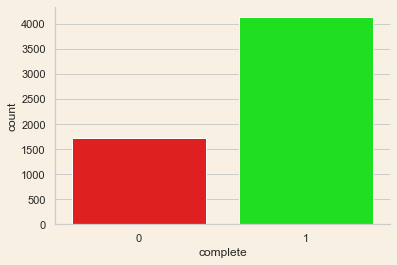

In [22]:
sns.set(style = 'whitegrid' ,rc={'axes.facecolor':'#f8f0e3', 'figure.facecolor':'#f8f0e3', "axes.spines.right": False, "axes.spines.top": False})
sns.countplot(x='complete', data=df, palette=["#FF0000", "#00FF00"])
df['complete'].value_counts()

In [6]:
sns.Countplot(x='M/F', data=df, palette=["#003F7D", "#FD7702"])

NameError: name 'sns' is not defined

# Feature selction and Model fitting

In [24]:
from sklearn.model_selection import train_test_split

In [27]:
x = df.iloc[:, 1:18]
y = df.iloc[:, 18:]

# Corelation Matrix

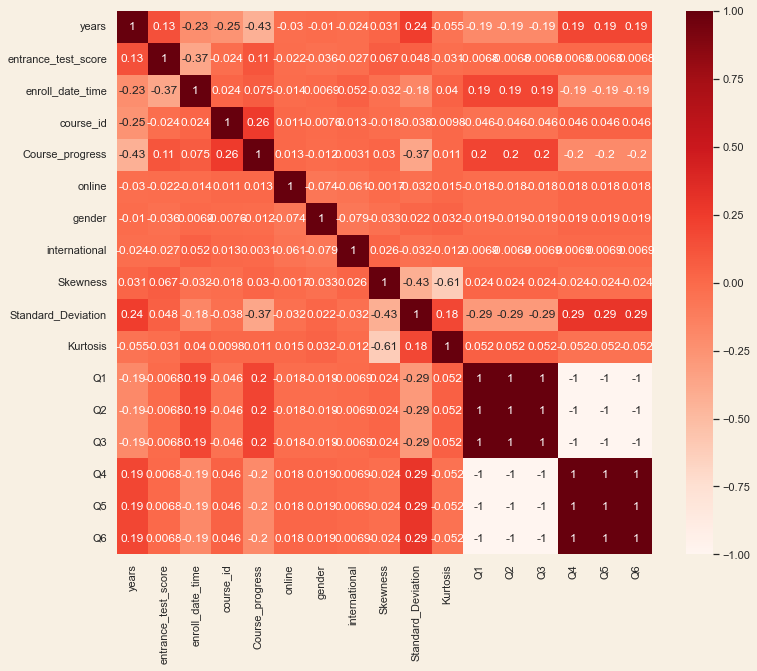

In [29]:
import seaborn as sns
plt.figure(figsize=(12,10))
cor = x.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [31]:
x_train

,years,entrance_test_score,enroll_date_time,course_id,Course_progress,online,gender,international,Skewness,Standard_Deviation,Kurtosis,Q1,Q2,Q3,Q4,Q5,Q6
1829,0,7.3,152169379,658463,21,1,1,0,-1.988080,19.768662,4.245210,0,0,0,1,1,1
893,4,33.9,157207982,658500,44,0,2,0,-0.568368,15.023315,-3.117290,0,0,0,1,1,1
5520,0,0.0,161286153,658434,10,1,1,0,-1.888891,26.866336,3.967898,1,1,1,0,0,0
3848,4,0.0,160056671,658464,31,0,2,0,-0.445993,21.323696,-2.416132,1,1,1,0,0,0
2010,0,5.7,153769289,807757,73,1,2,0,-0.884887,2.966479,1.448864,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4225,0,0.0,159998483,807758,64,1,2,0,-0.266900,3.633180,1.074380,1,1,1,0,0,0
2873,5,4.3,153769913,658439,34,1,1,0,-0.545364,23.188359,-3.210252,1,1,1,0,0,0
3792,0,0.0,160862906,807728,73,1,1,0,-1.660797,3.209361,2.711848,1,1,1,0,0,0
649,4,20.4,156258526,658464,72,0,1,0,-2.201796,13.794927,4.873012,1,1,1,0,0,0


# Models Prediction and Testing

In [32]:
import warnings
warnings.filterwarnings('ignore')

In [33]:
acc1 = []
model1 = []

# Logestic Regression

Logistic Regression's Accuracy is:  0.7037542662116041
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       434
           1       0.70      1.00      0.83      1031

    accuracy                           0.70      1465
   macro avg       0.35      0.50      0.41      1465
weighted avg       0.50      0.70      0.58      1465



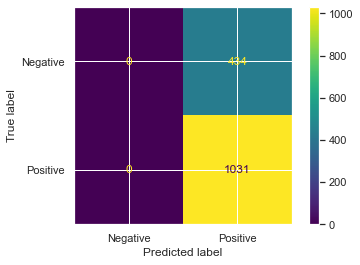

In [36]:
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
from sklearn.metrics import classification_report

LogReg = LogisticRegression(random_state=2)

LogReg.fit(x_train,y_train.values.ravel())

predicted_values3 = LogReg.predict(x_test)

x = metrics.accuracy_score(y_test, predicted_values3)
acc1.append(x)
model1.append('LR')
metrics.plot_confusion_matrix(LogReg , x_test, y_test, display_labels=['Negative', 'Positive'])
confusion1 = metrics.confusion_matrix(y_test,predicted_values3)
confusion1.ravel()
print("Logistic Regression's Accuracy is: ", x*1)
print(classification_report(y_test,predicted_values3))

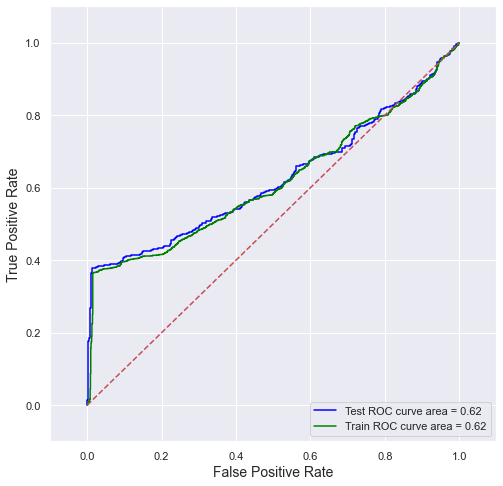

In [37]:
sns.set_style('darkgrid')
preds_train = LogReg.predict(x_train)
prob_train = np.squeeze(LogReg.predict_proba(x_train)[:,1].reshape(1,-1))
prob_test = np.squeeze(LogReg.predict_proba(x_test)[:,1].reshape(1,-1))
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test, prob_test)
fpr2, tpr2, thresholds2 = metrics.roc_curve(y_train, prob_train)
auc1 = metrics.auc(fpr1, tpr1)
auc2 = metrics.auc(fpr2, tpr2)
plt.figure(figsize=(8,8))
plt.plot(fpr1, tpr1, color='blue', label='Test ROC curve area = %0.2f'%auc1)
plt.plot(fpr2, tpr2, color='green', label='Train ROC curve area = %0.2f'%auc2)
plt.plot([0,1],[0,1], 'r--')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.xlabel('False Positive Rate', size=14)
plt.ylabel('True Positive Rate', size=14)
plt.legend(loc='lower right')
plt.show() 

# Decision Tree

DecisionTrees's Accuracy is:  0.9651877133105802
              precision    recall  f1-score   support

           0       1.00      0.88      0.94       434
           1       0.95      1.00      0.98      1031

    accuracy                           0.97      1465
   macro avg       0.98      0.94      0.96      1465
weighted avg       0.97      0.97      0.96      1465



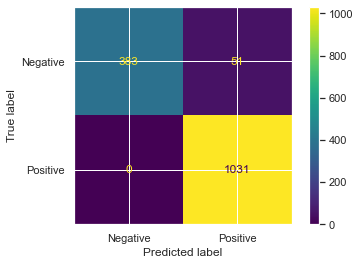

In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=143,max_depth=5)

DecisionTree.fit(x_train,y_train)

predicted_values2 = DecisionTree.predict(x_test)
x = metrics.accuracy_score(y_test, predicted_values2)
acc1.append(x)
model1.append('DT')
metrics.plot_confusion_matrix(DecisionTree , x_test, y_test, display_labels=['Negative', 'Positive'])
confusion2 = metrics.confusion_matrix(y_test,predicted_values2)
confusion2.ravel()
print("DecisionTrees's Accuracy is: ", x*1)
print(classification_report(y_test,predicted_values2))


# ROC CURVE DECISION TREE

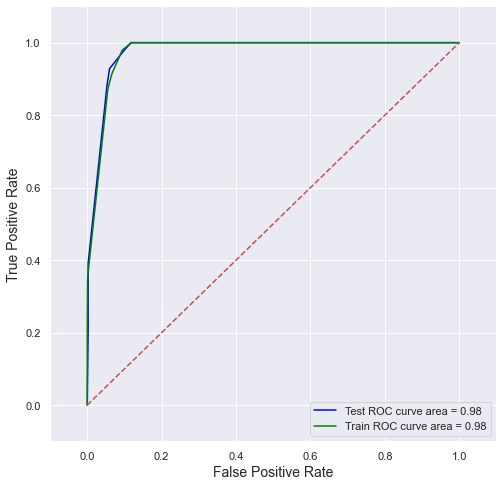

In [39]:
sns.set_style('darkgrid')
preds_train = DecisionTree.predict(x_train)
prob_train = np.squeeze(DecisionTree.predict_proba(x_train)[:,1].reshape(1,-1))
prob_test = np.squeeze(DecisionTree.predict_proba(x_test)[:,1].reshape(1,-1))
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test, prob_test)
fpr2, tpr2, thresholds2 = metrics.roc_curve(y_train, prob_train)
auc1 = metrics.auc(fpr1, tpr1)
auc2 = metrics.auc(fpr2, tpr2)
plt.figure(figsize=(8,8))
plt.plot(fpr1, tpr1, color='blue', label='Test ROC curve area = %0.2f'%auc1)
plt.plot(fpr2, tpr2, color='green', label='Train ROC curve area = %0.2f'%auc2)
plt.plot([0,1],[0,1], 'r--')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.xlabel('False Positive Rate', size=14)
plt.ylabel('True Positive Rate', size=14)
plt.legend(loc='lower right')
plt.show() 

# Random Forest

Accuracy of RFC model is  0.9638225255972697
              precision    recall  f1-score   support

           0       0.99      0.88      0.94       434
           1       0.95      1.00      0.97      1031

    accuracy                           0.96      1465
   macro avg       0.97      0.94      0.96      1465
weighted avg       0.97      0.96      0.96      1465



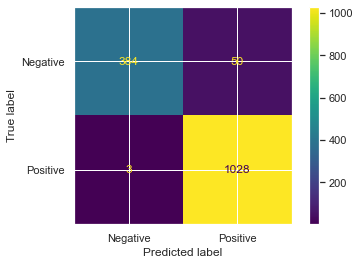

In [40]:
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as metrics
from sklearn.metrics import classification_report
RFC_model = RandomForestClassifier(random_state=0)
RFC_model.fit(x_train, y_train.values.ravel())
rfc_y_pred = RFC_model.predict(x_test)
score = accuracy_score(y_test,rfc_y_pred)

print('Accuracy of RFC model is ', score)
predicted_values4 = RFC_model.predict(x_test)

x = metrics.accuracy_score(y_test, predicted_values4)
acc1.append(x)
model1.append('RFC')
metrics.plot_confusion_matrix(RFC_model , x_test, y_test, display_labels=['Negative', 'Positive'])
confusion3 = metrics.confusion_matrix(y_test,rfc_y_pred)
confusion3.ravel()
print(classification_report(y_test,predicted_values4))

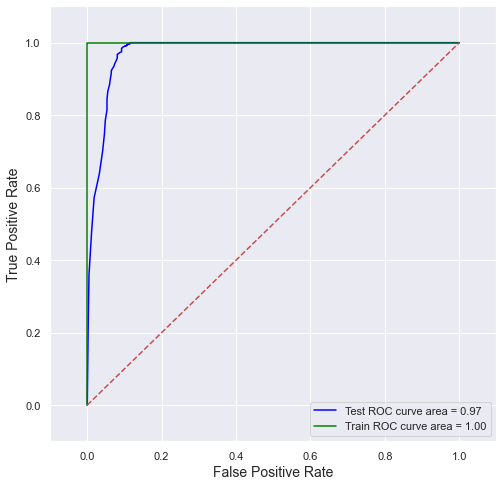

In [41]:
sns.set_style('darkgrid')
preds_train = RFC_model.predict(x_train)
prob_train = np.squeeze(RFC_model.predict_proba(x_train)[:,1].reshape(1,-1))
prob_test = np.squeeze(RFC_model.predict_proba(x_test)[:,1].reshape(1,-1))
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test, prob_test)
fpr2, tpr2, thresholds2 = metrics.roc_curve(y_train, prob_train)
auc1 = metrics.auc(fpr1, tpr1)
auc2 = metrics.auc(fpr2, tpr2)
plt.figure(figsize=(8,8))
plt.plot(fpr1, tpr1, color='blue', label='Test ROC curve area = %0.2f'%auc1)
plt.plot(fpr2, tpr2, color='green', label='Train ROC curve area = %0.2f'%auc2)
plt.plot([0,1],[0,1], 'r--')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.xlabel('False Positive Rate', size=14)
plt.ylabel('True Positive Rate', size=14)
plt.legend(loc='lower right')
plt.show() 

# KNN Classifier

Accuracy of KNN Clasifier model is  0.7276450511945393
              precision    recall  f1-score   support

           0       0.56      0.40      0.47       434
           1       0.77      0.86      0.82      1031

    accuracy                           0.73      1465
   macro avg       0.67      0.63      0.64      1465
weighted avg       0.71      0.73      0.71      1465



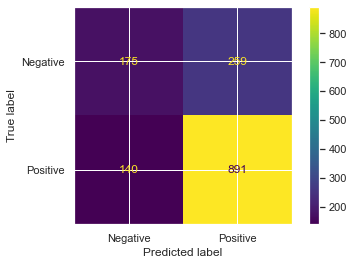

In [42]:
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
KNN_model =KNeighborsClassifier(n_neighbors=9, metric='minkowski', p=2)
KNN_model.fit(x_train,y_train.values.ravel())
knn_y_pred = KNN_model.predict(x_test)
score = accuracy_score(y_test,knn_y_pred)

print('Accuracy of KNN Clasifier model is ', score)

predicted_values5 = KNN_model.predict(x_test)

x = metrics.accuracy_score(y_test, predicted_values5)
acc1.append(x)
model1.append('KNN')
metrics.plot_confusion_matrix(KNN_model , x_test, y_test, display_labels=['Negative', 'Positive'])
confusion4 = metrics.confusion_matrix(y_test,predicted_values5)
confusion4.ravel()
print(classification_report(y_test,predicted_values5))

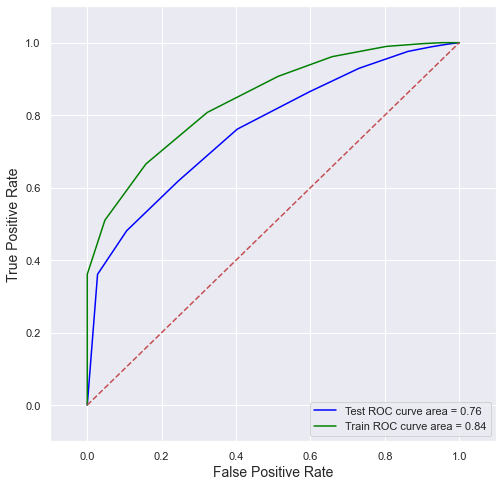

In [43]:
sns.set_style('darkgrid')
preds_train = KNN_model.predict(x_train)
prob_train = np.squeeze(KNN_model.predict_proba(x_train)[:,1].reshape(1,-1))
prob_test = np.squeeze(KNN_model.predict_proba(x_test)[:,1].reshape(1,-1))
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test, prob_test)
fpr2, tpr2, thresholds2 = metrics.roc_curve(y_train, prob_train)
auc1 = metrics.auc(fpr1, tpr1)
auc2 = metrics.auc(fpr2, tpr2)
plt.figure(figsize=(8,8))
plt.plot(fpr1, tpr1, color='blue', label='Test ROC curve area = %0.2f'%auc1)
plt.plot(fpr2, tpr2, color='green', label='Train ROC curve area = %0.2f'%auc2)
plt.plot([0,1],[0,1], 'r--')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.xlabel('False Positive Rate', size=14)
plt.ylabel('True Positive Rate', size=14)
plt.legend(loc='lower right')
plt.show() 


# Polynomial SVM

Accuracy of SVM model is  0.7037542662116041
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       434
           1       0.70      1.00      0.83      1031

    accuracy                           0.70      1465
   macro avg       0.35      0.50      0.41      1465
weighted avg       0.50      0.70      0.58      1465



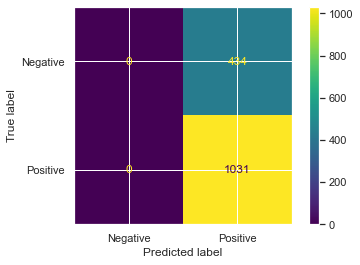

In [44]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report
svm_model = SVC(kernel='poly', degree=11,probability=True)
svm_model.fit(x_train,y_train.values.ravel())
svm_y_pred = svm_model.predict(x_test)
score = accuracy_score(y_test,svm_y_pred)

print('Accuracy of SVM model is ', score)

predicted_values6 = svm_model.predict(x_test)
x = metrics.accuracy_score(y_test, predicted_values6)
acc1.append(x)
model1.append(' SVM')
metrics.plot_confusion_matrix(svm_model , x_test, y_test, display_labels=['Negative', 'Positive'])
confusion5 = metrics.confusion_matrix(y_test,svm_y_pred)
confusion5.ravel()

print(classification_report(y_test,predicted_values6))

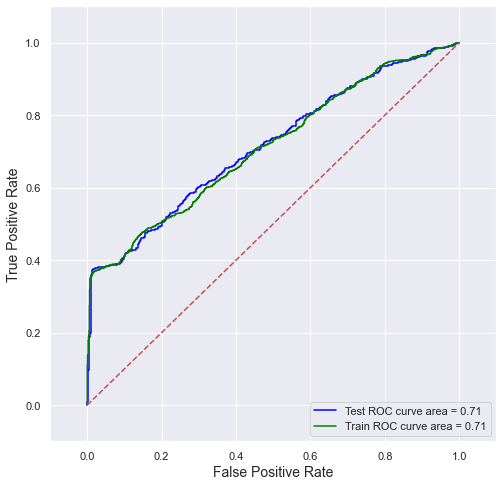

In [45]:
sns.set_style('darkgrid')
preds_train = svm_model.predict(x_train)
prob_train = np.squeeze(svm_model.predict_proba(x_train)[:,1].reshape(1,-1))
prob_test = np.squeeze(svm_model.predict_proba(x_test)[:,1].reshape(1,-1))
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test, prob_test)
fpr2, tpr2, thresholds2 = metrics.roc_curve(y_train, prob_train)
auc1 = metrics.auc(fpr1, tpr1)
auc2 = metrics.auc(fpr2, tpr2)
plt.figure(figsize=(8,8))
plt.plot(fpr1, tpr1, color='blue', label='Test ROC curve area = %0.2f'%auc1)
plt.plot(fpr2, tpr2, color='green', label='Train ROC curve area = %0.2f'%auc2)
plt.plot([0,1],[0,1], 'r--')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.xlabel('False Positive Rate', size=14)
plt.ylabel('True Positive Rate', size=14)
plt.legend(loc='lower right')
plt.show() 

# Gradient Boost 

Accuracy of GB model is  0.9651877133105802
              precision    recall  f1-score   support

           0       0.56      0.40      0.47       434
           1       0.77      0.86      0.82      1031

    accuracy                           0.73      1465
   macro avg       0.67      0.63      0.64      1465
weighted avg       0.71      0.73      0.71      1465



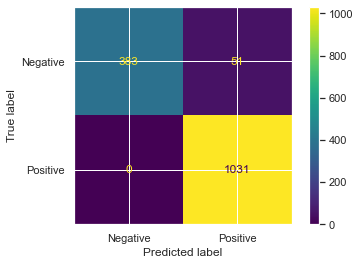

In [46]:
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingClassifier
GB_model =GradientBoostingClassifier(n_estimators=10, learning_rate=1.0,max_depth=1, random_state=0).fit(x_train,y_train.values.ravel())
GB_model.fit(x_train,y_train.values.ravel())
gb_y_pred = GB_model.predict(x_test)
score = accuracy_score(y_test,gb_y_pred)

print('Accuracy of GB model is ', score)
predicted_values7 = KNN_model.predict(x_test)

x = metrics.accuracy_score(y_test, predicted_values7)
acc1.append(x)
model1.append('GB')
metrics.plot_confusion_matrix( GB_model, x_test, y_test, display_labels=['Negative', 'Positive'])
confusion6 = metrics.confusion_matrix(y_test,gb_y_pred)
confusion6.ravel()

print(classification_report(y_test,predicted_values7))

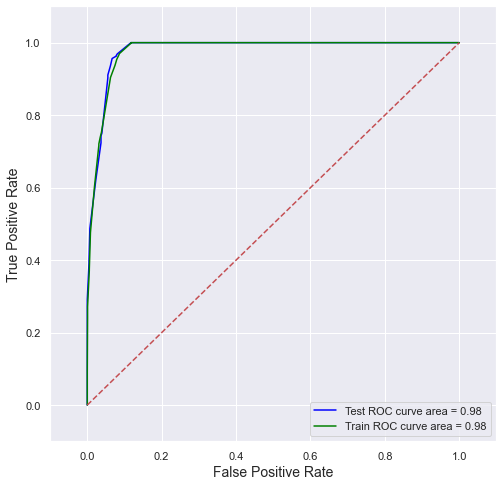

In [47]:
sns.set_style('darkgrid')
preds_train = GB_model.predict(x_train)
prob_train = np.squeeze(GB_model.predict_proba(x_train)[:,1].reshape(1,-1))
prob_test = np.squeeze(GB_model.predict_proba(x_test)[:,1].reshape(1,-1))
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test, prob_test)
fpr2, tpr2, thresholds2 = metrics.roc_curve(y_train, prob_train)
auc1 = metrics.auc(fpr1, tpr1)
auc2 = metrics.auc(fpr2, tpr2)
plt.figure(figsize=(8,8))
plt.plot(fpr1, tpr1, color='blue', label='Test ROC curve area = %0.2f'%auc1)
plt.plot(fpr2, tpr2, color='green', label='Train ROC curve area = %0.2f'%auc2)
plt.plot([0,1],[0,1], 'r--')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.xlabel('False Positive Rate', size=14)
plt.ylabel('True Positive Rate', size=14)
plt.legend(loc='lower right')
plt.show() 

# ADA Boost 

Accuracy of ADABOOST model is  0.9604095563139932
              precision    recall  f1-score   support

           0       0.98      0.88      0.93       434
           1       0.95      0.99      0.97      1031

    accuracy                           0.96      1465
   macro avg       0.97      0.94      0.95      1465
weighted avg       0.96      0.96      0.96      1465



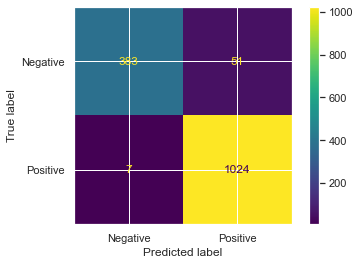

In [48]:
from sklearn.metrics import classification_report
from sklearn.ensemble import AdaBoostClassifier
adaboost = AdaBoostClassifier(n_estimators=50,learning_rate=1)
model = adaboost.fit(x_train,y_train.values.ravel())
y_pred = model.predict(x_test)
score = accuracy_score(y_test,y_pred)

print('Accuracy of ADABOOST model is ', score)
predicted_values8 = adaboost.predict(x_test)
x = metrics.accuracy_score(y_test, predicted_values8)
acc1.append(x)
model1.append('ADA')
metrics.plot_confusion_matrix(adaboost , x_test, y_test, display_labels=['Negative', 'Positive'])
confusion7 = metrics.confusion_matrix(y_test,y_pred)
confusion7.ravel()

print(classification_report(y_test,predicted_values8))

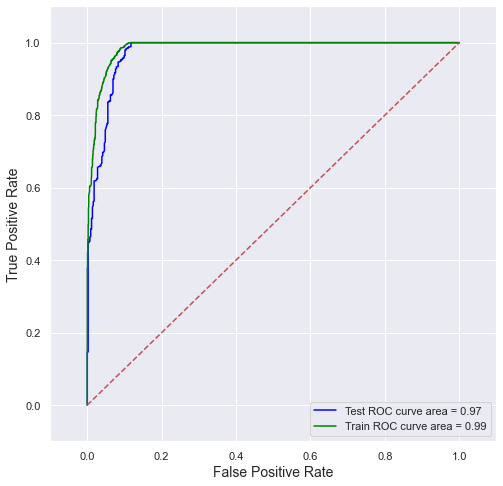

In [49]:
sns.set_style('darkgrid')
preds_train = adaboost.predict(x_train)
prob_train = np.squeeze(adaboost.predict_proba(x_train)[:,1].reshape(1,-1))
prob_test = np.squeeze(adaboost.predict_proba(x_test)[:,1].reshape(1,-1))
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test, prob_test)
fpr2, tpr2, thresholds2 = metrics.roc_curve(y_train, prob_train)
auc1 = metrics.auc(fpr1, tpr1)
auc2 = metrics.auc(fpr2, tpr2)
plt.figure(figsize=(8,8))
plt.plot(fpr1, tpr1, color='blue', label='Test ROC curve area = %0.2f'%auc1)
plt.plot(fpr2, tpr2, color='green', label='Train ROC curve area = %0.2f'%auc2)
plt.plot([0,1],[0,1], 'r--')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.xlabel('False Positive Rate', size=14)
plt.ylabel('True Positive Rate', size=14)
plt.legend(loc='lower right')
plt.show() 